# ***Theoretical Foundations of Machine Learning***

## **TD 1: Introduction to Python, Numpy...**

### **1. Premiers pas avec Numpy et Matplotlib**

#### 1.1 Numpy

In [41]:
import numpy as np

In [48]:
# Créer une matrice 8x8 à la façon d'un échéquier
E = np.ones((8,8))
E[2:6] = np.zeros((4,8))
E

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [58]:
# Créer la matrice M et extraire la matrice m 
M = np.linspace(1,20,20)
M = M.reshape((5,4))
M = M.T


array([[ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.],
       [ 4.,  8., 12., 16., 20.]])

#### 1.2 Matplotlib

In [59]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

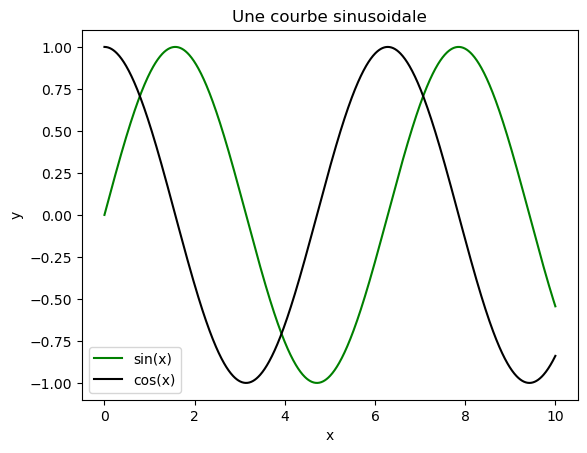

In [72]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x), 'g-', label = 'sin(x)')
plt.plot(x,np.cos(x), 'k-', label = 'cos(x)')
plt.title("Une courbe sinusoidale")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

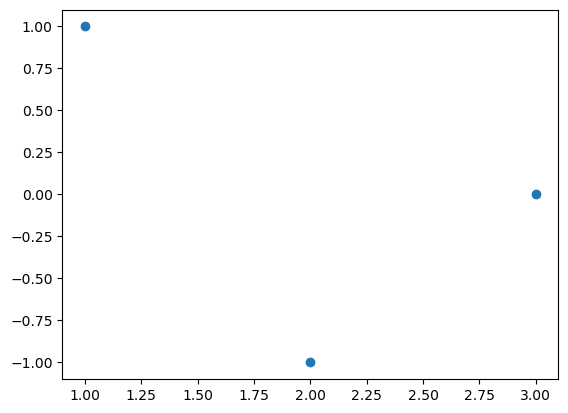

In [73]:
plt.plot([2,1,3],[-1,1,0], 'o')
plt.show

### **2. Problème de régression en dimension 1**

#### 2.1 Génération des données

In [74]:
m = 15
x = 2*np.random.random_sample(m)-1
x

array([-0.34122786, -0.94053503,  0.71108378,  0.97769504, -0.09127302,
        0.7803    , -0.07558759, -0.97547457, -0.71285265,  0.37078149,
       -0.12189423, -0.93772696, -0.16336267,  0.75181331, -0.17907985])

In [80]:
def g(x):
    y = (3/2)*x**3-x**2-(3/4)*x+1
    return y

In [82]:
y = g(x) + (1/20)*np.random.randn()
y

array([ 1.06004177, -0.44705511,  0.48053014,  0.69284533,  1.03913781,
        0.49871093,  1.03048377, -0.6321105 ,  0.46327134,  0.64105129,
        1.05400014, -0.43274205,  1.06944943,  0.48848468,  1.07378013])

In [118]:
def generate_data(m):
    x = 2*np.random.random_sample(m)-1
    y = g(x) + (1/20)*np.random.randn()
    return x,y

x_test , y_test = generate_data(30)

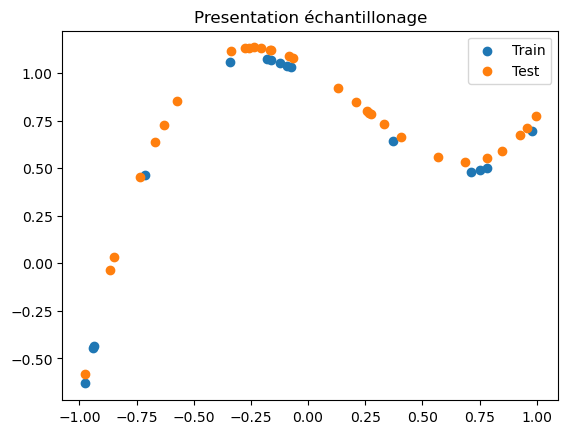

In [120]:
plt.scatter(x,y, label = "Train")
plt.scatter(x_test, y_test, label = 'Test')
plt.title("Presentation échantillonage")
plt.legend()
plt.show()

#### 2.2 Régression Linéaire

In [121]:
from sklearn.linear_model import LinearRegression 
f = LinearRegression()

In [122]:
# On met X au format dont on a besoin pour utilier la fonction .fit
X = x[:, np.newaxis]
X_test = x_test[:, np.newaxis]

In [123]:
f.fit(X,y)

LinearRegression()

In [124]:
f.predict(X)

array([0.42064861, 0.16631058, 0.86723575, 0.98038204, 0.52672614,
       0.8966102 , 0.53338283, 0.1514827 , 0.26293597, 0.72281596,
       0.5137309 , 0.16750229, 0.49613225, 0.88452082, 0.48946208])

In [125]:
f.predict(X_test)

array([0.65448888, 0.28165286, 0.95935639, 0.49710229, 0.4479211 ,
       0.7384981 , 0.806148  , 0.53768644, 0.62155156, 0.19870592,
       0.46590105, 0.42234856, 0.67481385, 0.47876409, 0.89758266,
       0.25399326, 0.98790674, 0.29733972, 0.15129066, 0.20552579,
       0.67766741, 0.53012076, 0.45642683, 0.97138271, 0.85579979,
       0.49482574, 0.70556715, 0.92498772, 0.68138309, 0.32274531])

<function matplotlib.pyplot.show(close=None, block=None)>

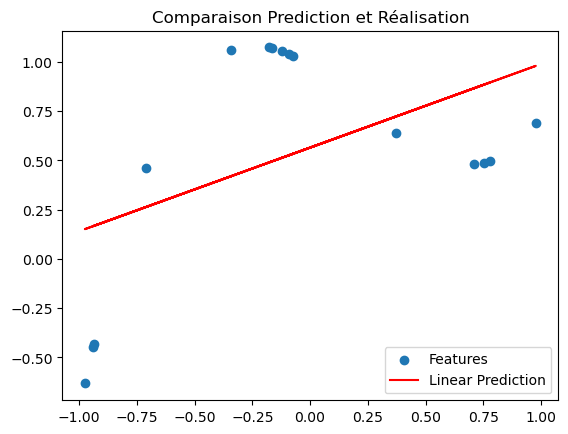

In [131]:
plt.scatter(x,y, label = "Features")
plt.plot(x, f.predict(X), color = 'r', label = "Linear Prediction")
plt.legend()
plt.title("Comparaison Prediction et Réalisation")
plt.show

In [127]:
# On calcule les erreurs moyennes d'apprentissage et de test
E_train = sum((y - f.predict(X))**2)
E_train

3.82524549192449

In [128]:
E_test = sum((y_test - f.predict(X_test))**2)
E_test

5.6819459876616145

Le modèle n'est pas très bon car linéaire. De plus, en prenant un échantillon de test plus grand que celui de l'apprentissage, on a forcément que l'erreur est plus importante sur léchantillon test (on somme plus de terme qui sont tous positifs).

#### 2.3 Regression Polynomiale

In [134]:
from sklearn.preprocessing import PolynomialFeatures
psi = PolynomialFeatures(2,include_bias=False).fit_transform

In [144]:
psi(X)

array([[-0.34122786,  0.11643645],
       [-0.94053503,  0.88460615],
       [ 0.71108378,  0.50564014],
       [ 0.97769504,  0.9558876 ],
       [-0.09127302,  0.00833077],
       [ 0.7803    ,  0.60886808],
       [-0.07558759,  0.00571348],
       [-0.97547457,  0.95155063],
       [-0.71285265,  0.50815889],
       [ 0.37078149,  0.13747891],
       [-0.12189423,  0.0148582 ],
       [-0.93772696,  0.87933185],
       [-0.16336267,  0.02668736],
       [ 0.75181331,  0.56522325],
       [-0.17907985,  0.03206959]])

In [145]:
f.fit(psi(X),y)

LinearRegression()

In [147]:
f.predict(psi(X))

array([ 0.81277339, -0.35837153,  0.69452939,  0.22459439,  1.0356219 ,
        0.5896226 ,  1.04439292, -0.45437643,  0.1924257 ,  1.03593525,
        1.0167249 , -0.3507883 ,  0.98739339,  0.63424985,  0.97515171])

<function matplotlib.pyplot.show(close=None, block=None)>

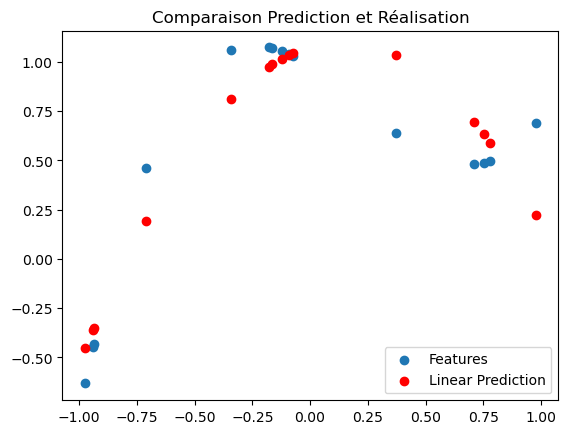

In [149]:
plt.scatter(x,y, label = "Features")
plt.scatter(x, f.predict(psi(X)), color = 'r', label = "Linear Prediction")
plt.legend()
plt.title("Comparaison Prediction et Réalisation")
plt.show